<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Открываем-файлы-и-изучаим-их" data-toc-modified-id="Открываем-файлы-и-изучаим-их-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открываем файлы и изучаим их</a></span></li><li><span><a href="#Проверяем-эффективность-обогащения." data-toc-modified-id="Проверяем-эффективность-обогащения.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверяем эффективность обогащения.</a></span></li><li><span><a href="#Анализируем-признаки,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализируем-признаки,-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализируем признаки, недоступных в тестовой выборке</a></span></li><li><span><a href="#Проводим-предобработку-данных" data-toc-modified-id="Проводим-предобработку-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проводим предобработку данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#Сравним-распределения-размеров-гранул-сырья" data-toc-modified-id="Сравним-распределения-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравним распределения размеров гранул сырья</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Напишем-функцию-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишем функцию для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Обучим-разные-модели-и-оценим-их-качество-кросс-валидацией.-Выберем-лучшую-модель-и-проверим-её-на-тестовой-выборке." data-toc-modified-id="Обучим-разные-модели-и-оценим-их-качество-кросс-валидацией.-Выберем-лучшую-модель-и-проверим-её-на-тестовой-выборке.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке.</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.dummy import DummyRegressor

from sklearn.preprocessing import StandardScaler

### Открываем файлы и изучаим их

* gold_train - обучающая выборка;
* gold_test  - тестовая выборка;
* gold_full  - исходные данные.

In [3]:
gold_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')

In [4]:
gold_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')

In [5]:
gold_full  = pd.read_csv('/datasets/gold_recovery_full_new.csv')

 * Обозначения
* 0   date                                        -        Дата
* 1   final.output.concentrate_ag                  -       Конечная концентрация Ag после очистки
* 2   final.output.concentrate_pb                 -        Конечная концентрация Pb после очистки
* 3   final.output.concentrate_sol                -        Конечная концентрация Sol после очистки
* 4   final.output.concentrate_au                 -        Конечная концентрация Au после очистки
* 5   final.output.recovery                        -       КПД процесса очистки
* 6   final.output.tail_ag                       -         Конечное содержание Ag в отвальных хвостах
* 7   final.output.tail_pb                        -        Конечное содержание Pb в отвальных хвостах
* 8   final.output.tail_sol                       -        Конечное содержание Sol в отвальных хвостах
* 9   final.output.tail_au                         -       Конечное содержание Au в отвальных хвостах
* 10 primary_cleaner.input.sulfate                   -     входное содержание сульфата на первичной очистке
* 11 primary_cleaner.input.depressant - входное содержание депрессанта на первичной очистке
* 12 primary_cleaner.input.feed_size - размер подачи на первичной очистке
* 13 primary_cleaner.input.xanthate - входное содержание ксантогената на первичной очистке
* 14 primary_cleaner.output.concentrate_ag - концентрация серебра в концентрате на первичной очистке
* 15 primary_cleaner.output.concentrate_pb - концентрация свинца в концентрате на первичной очистке
* 16 primary_cleaner.output.concentrate_sol - концентрация твердых веществ в концентрате на первичной очистке
* 17 primary_cleaner.output.concentrate_au - концентрация золота в концентрате на первичной очистке
* 18 primary_cleaner.output.tail_ag - содержание серебра в отвальных хвостах на первичной очистке
* 19 primary_cleaner.output.tail_pb - содержание свинца в отвальных хвостах на первичной очистке
* 20 primary_cleaner.output.tail_sol - содержание твердых веществ в отвальных хвостах на первичной очистке
* 21 primary_cleaner.output.tail_au - содержание золота в отвальных хвостах на первичной очистке
* 22 primary_cleaner.state.floatbank8_a_air - расход воздуха на флотационной установке 8A на первичной очистке
* 23 primary_cleaner.state.floatbank8_a_level - уровень жидкости на флотационной установке 8A на первичной очистке
* 24 primary_cleaner.state.floatbank8_b_air - расход воздуха на флотационной установке 8B на первичной очистке
* 25 primary_cleaner.state.floatbank8_b_level - уровень жидкости на флотационной установке 8B на первичной очистке
* 26 primary_cleaner.state.floatbank8_c_air - расход воздуха на флотационной установке 8C на первичной очистке
* 27 primary_cleaner.state.floatbank8_c_level - уровень жидкости на флотационной установке 8C на первичной очистке
* 28 primary_cleaner.state.floatbank8_d_air - расход воздуха на флотационной установке 8D на первичной очистке
* 29 primary_cleaner.state.floatbank8_d_level - уровень жидкости на флотационной установке 8D на первичной очистке
* 30 rougher.calculation.sulfate_to_au_concentrate - соотношение сульфата к золоту в концентрате на флотации
* 31 rougher.calculation.floatbank10_sulfate_to_au_feed - Сульфат-золото-подача для флотации 10
* 32 rougher.calculation.floatbank11_sulfate_to_au_feed - Сульфат-золото-подача для флотации 11
* 33 rougher.calculation.au_pb_ratio - Отношение золота к свинцу
* 34 rougher.input.feed_ag - Содержание серебра в исходной руде
* 35 rougher.input.feed_pb - Содержание свинца в исходной руде
* 36 rougher.input.feed_rate - Скорость подачи исходной руды
* 37 rougher.input.feed_size - Размер исходной руды
* 38 rougher.input.feed_sol - Содержание растворенных веществ в исходной руде
* 39 rougher.input.feed_au - Содержание золота в исходной руде
* 40 rougher.input.floatbank10_sulfate - Сульфатная подача для флотации 10
* 41 rougher.input.floatbank10_xanthate - Ксантогенатная подача для флотации 10
* 42 rougher.input.floatbank11_sulfate - Сульфатная подача для флотации 11
* 43 rougher.input.floatbank11_xanthate - Ксантогенатная подача для флотации 11
* 44 rougher.output.concentrate_ag - Содержание серебра в концентрате
* 45 rougher.output.concentrate_pb - Содержание свинца в концентрате
* 46 rougher.output.concentrate_sol - Содержание растворенных веществ в концентрате
* 47 rougher.output.concentrate_au - Содержание золота в концентрате
* 48 rougher.output.recovery - Коэффициент извлечения полезных ископаемых
* 49 rougher.output.tail_ag - Содержание серебра в отвальных хвостах
* 50 rougher.output.tail_pb - Содержание свинца в отвальных хвостах
* 51 rougher.output.tail_sol - Содержание растворенных веществ в отвальных хвостах
* 52 rougher.output.tail_au - Содержание золота в отвальных хвостах
* 53 rougher.state.floatbank10_a_air - Подача воздуха в флотационную установку 10, ячейка A
* 54 rougher.state.floatbank10_a_level - Уровень жидкости в флотационной установке 10, ячейка A                 
* 55 rougher.state.floatbank10_b_air - расход воздуха на флотационной установке floatbank10_b воздух
* 56 rougher.state.floatbank10_b_level - уровень золотосодержащей пульпы на флотационной установке floatbank10_b
* 57 rougher.state.floatbank10_c_air - расход воздуха на флотационной установке floatbank10_c воздух
* 58 rougher.state.floatbank10_c_level - уровень золотосодержащей пульпы на флотационной установке floatbank10_c
* 59 rougher.state.floatbank10_d_air - расход воздуха на флотационной установке floatbank10_d воздух
* 60 rougher.state.floatbank10_d_level - уровень золотосодержащей пульпы на флотационной установке floatbank10_d
* 61 rougher.state.floatbank10_e_air - расход воздуха на флотационной установке floatbank10_e воздух
* 62 rougher.state.floatbank10_e_level - уровень золотосодержащей пульпы на флотационной установке floatbank10_e
* 63 rougher.state.floatbank10_f_air - расход воздуха на флотационной установке floatbank10_f воздух
* 64 rougher.state.floatbank10_f_level - уровень золотосодержащей пульпы на флотационной установке floatbank10_f
* 65 secondary_cleaner.output.tail_ag - содержание серебра в отвальных хвостах после флотации на вторичной очистке
* 66 secondary_cleaner.output.tail_pb - содержание свинца в отвальных хвостах после флотации на вторичной очистке
* 67 secondary_cleaner.output.tail_sol - содержание твердых веществ в отвальных хвостах после флотации на вторичной очистке
* 68 secondary_cleaner.output.tail_au - содержание золота в отвальных хвостах после флотации на вторичной очистке               
* 69 secondary_cleaner.state.floatbank2_a_air - воздух на флотационной установке 2A во время вторичной очистки
* 70 secondary_cleaner.state.floatbank2_a_level - уровень жидкости на флотационной установке 2A во время вторичной очистки
* 71 secondary_cleaner.state.floatbank2_b_air - воздух на флотационной установке 2B во время вторичной очистки
* 72 secondary_cleaner.state.floatbank2_b_level - уровень жидкости на флотационной установке 2B во время вторичной очистки
* 73 secondary_cleaner.state.floatbank3_a_air - воздух на флотационной установке 3A во время вторичной очистки
* 74 secondary_cleaner.state.floatbank3_a_level - уровень жидкости на флотационной установке 3A во время вторичной очистки
* 75 secondary_cleaner.state.floatbank3_b_air - воздух на флотационной установке 3B во время вторичной очистки
* 76 secondary_cleaner.state.floatbank3_b_level - уровень жидкости на флотационной установке 3B во время вторичной очистки
* 77 secondary_cleaner.state.floatbank4_a_air - воздух на флотационной установке 4A во время вторичной очистки
* 78 secondary_cleaner.state.floatbank4_a_level - уровень жидкости на флотационной установке 4A во время вторичной очистки
* 79 secondary_cleaner.state.floatbank4_b_air - воздух на флотационной установке 4B во время вторичной очистки
* 80 secondary_cleaner.state.floatbank4_b_level - уровень жидкости на флотационной установке 4B во время вторичной очистки
* 81 secondary_cleaner.state.floatbank5_a_air - воздух на флотационной установке 5A во время вторичной очистки
* 82 secondary_cleaner.state.floatbank5_a_level - уровень жидкости на флотационной установке 5A во время вторичной очистки
* 83 secondary_cleaner.state.floatbank5_b_air - воздух на флотационной установке 5B во время вторичной очистки
* 84 secondary_cleaner.state.floatbank5_b_level - уровень жидкости на флотационной установке 5B во время вторичной очистки
* 85 secondary_cleaner.state.floatbank6_a_air - воздух на флотационной установке 6A во время вторичной очистки
* 86 secondary_cleaner.state.floatbank6_a_level - уровень жидкости на флотационной установке 6A во время вторичной очистки

In [6]:
gold_train.head(4)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129


In [7]:
gold_test.head(4)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987


In [8]:
gold_full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [9]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [10]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [11]:
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [12]:
gold_train.isna().sum() # Посмотрим пропуски.

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [13]:
gold_test.isna().sum() # Посмотрим пропуски.

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [14]:
gold_full.isna().sum() # Посмотрим пропуски.

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [15]:
print(gold_train.duplicated().sum()) # Проверим есть ли явные дублекаты

0


In [16]:
print(gold_test.duplicated().sum()) # Проверим есть ли явные дублекаты

0


In [17]:
print(gold_full.duplicated().sum()) # Проверим есть ли явные дублекаты

0


In [18]:
gold_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [19]:
gold_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [20]:
gold_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


1.1 Резюме.

Выгрузили данные. Получилось 86 пораметров и время их фиксации. Пораметры можно описать как (Концентрация и соотношения разных веществ веществ на разных стадиях. КПД процесса очистки и % извлечения. Размер и скорость подачи. Расход воздуха и уровень жидкости на раных установках. Размер рууды). Пропусков обноружилось незначительное количество, их можно удалить либо принять как рядом сьоящее число поскольку (соседние по времени параметры часто похожи). Явных дублекатов обноружено небыло.

### Проверяем эффективность обогащения. 

In [21]:
# Проверка эффективности обогащения
# Расчет эффективности обогащения на обучающей выборке
C = gold_train['rougher.output.concentrate_au']
F = gold_train['rougher.input.feed_au']
T = gold_train['rougher.output.tail_au']
recovery = ((C * (F - T)) / (F * (C - T))) * 100

# Нахождение MAE между расчетами и значением признака
mae = mean_absolute_error(recovery, gold_train['rougher.output.recovery'])
print("MAE =", mae)

MAE = 9.73512347450521e-15


1.2 Резюме.

Ошибка крайне мала, эффективность обогащения рассчитана правильно.

 ### Анализируем признаки, недоступных в тестовой выборке

In [22]:
# Анализ признаков, недоступных в тестовой выборке
set(gold_train) - set(gold_test) # Найдем отсутствующие признаки.

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

1.3 Резюме.

В тестовой выборки отсутствует часть пораметров таких как (Концентрация вещества на разных стадиях очистки) поскольку эти данные  получают позже. Также в тестовом наборе нет целевых признаков. Все данные относятся к float64 кроме колонки с датами.

 ### Проводим предобработку данных

Поскольку соседние по времени параметры часто похожи мы используем ffill (forward fill) - это метод использует значение предыдущей ячейки, чтобы заполнить пропущенное значение.

gold_train

In [23]:
gold_train.fillna(method='ffill', inplace=True)

gold_test

In [24]:
gold_test.fillna(method='ffill', inplace=True)

gold_full

In [25]:
gold_full.fillna(method='ffill', inplace=True)

In [26]:
gold_train.isna().sum().sum() #Проверка остались ли пропуски

0

In [27]:
gold_test.isna().sum().sum()

0

In [28]:
gold_full.isna().sum().sum()

0

 Добавление целевых признаков в тестовую выборку

In [29]:
# выбор объектов из тестовой выборки
test_objects = gold_full.loc[gold_full['date'].isin(gold_test['date'])].reset_index(drop=True)

# добавление целевых признаков в тестовую выборку
gold_test['rougher.output.recovery'] = test_objects['rougher.output.recovery']
gold_test['final.output.recovery'] = test_objects['final.output.recovery']

Из обучающей выборки удалим признаки отсутствующие в тестовой.

In [30]:
colms = list(gold_test.columns)
gold_train = gold_train[colms]

In [31]:
print(gold_train.shape)
print(gold_test.shape)

(14149, 55)
(5290, 55)


1.4 Резюме.

Были заполнены пропуски с помощью предыдущих ячеек посколько значения близки. Еще из обучающей выборки удалим признаки отсутствующие тестовой. Это сделано чтобы модель непереобучалась.

1 Вывод:

Были открыты и изучены файлы. Проверка эффективности обогощения показала свою правельность. Пропуски заполнили предыдущими значениями. В тестовой  выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков. Поэтому мы добовляем в тестовую выборку целевые признаки, а из обучающей выборки удалим признаки отсутствующие в тестовой. Теперь данные готовы к дальнейшей работе.

## Анализ данных

 ### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

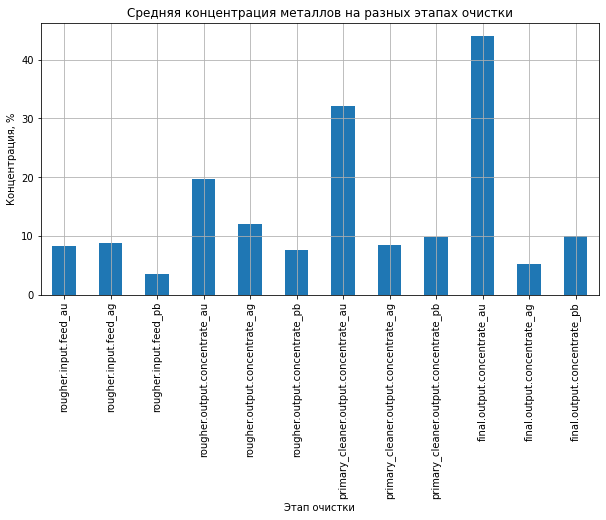

In [32]:
# 2.1. Изменение концентрации металлов на разных этапах очистки
# Список столбцов с концентрацией металлов
metals = ['au', 'ag', 'pb']
cols = ['rougher.input.feed_{}'.format(metal) for metal in metals] + \
       ['rougher.output.concentrate_{}'.format(metal) for metal in metals] + \
       ['primary_cleaner.output.concentrate_{}'.format(metal) for metal in metals] + \
       ['final.output.concentrate_{}'.format(metal) for metal in metals]

# Среднее значение концентрации металлов на разных этапах очистки
means = gold_full[cols].mean()
means.plot(kind='bar', grid=True, figsize=(10, 5))
plt.title('Средняя концентрация металлов на разных этапах очистки')
plt.xlabel('Этап очистки')
plt.ylabel('Концентрация, %')
plt.show()

* Название металов и этапов (нумерация соответствует № в обозначении). 
* 34 rougher.input.feed_ag - Содержание серебра в исходной руде
* 35 rougher.input.feed_pb - Содержание свинца в исходной руде
* 39 rougher.input.feed_au - Содержание золота в исходной руде

* 44 rougher.output.concentrate_ag - Содержание серебра в концентрате
* 45 rougher.output.concentrate_pb - Содержание свинца в концентрате
* 47 rougher.output.concentrate_au - Содержание золота в концентрате

* 14 primary_cleaner.output.concentrate_ag - концентрация серебра в концентрате на первичной очистке
* 15 primary_cleaner.output.concentrate_pb - концентрация свинца в концентрате на первичной очистке
* 17 primary_cleaner.output.concentrate_au - концентрация золота в концентрате на первичной очистке

* 1 final.output.concentrate_ag - Конечная концентрация серебра (Ag) после очистки
* 2 final.output.concentrate_pb - Конечная концентрация свинца (Pb) после очистки
* 4 final.output.concentrate_au - Конечная концентрация золота (Au) после очистки

2.1 Резюме.

С каждым этапом концентрация золота в руде повышается.

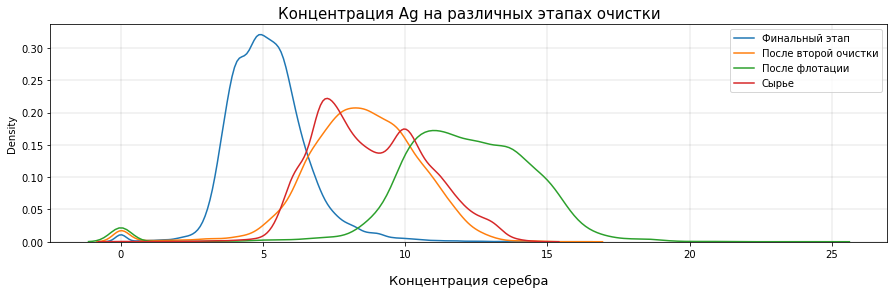

In [33]:
plt.figure(figsize=(15, 4))
plt.title('Концентрация Ag на различных этапах очистки', fontsize=15)
plt.xlabel('Концентрация серебра', labelpad=15, fontsize=13)
sns.kdeplot(gold_full['final.output.concentrate_ag'], label = 'Финальный этап')
sns.kdeplot(gold_full['primary_cleaner.output.concentrate_ag'], label = 'После второй очистки')
sns.kdeplot(gold_full['rougher.output.concentrate_ag'], label = 'После флотации')
sns.kdeplot(gold_full['rougher.input.feed_ag'], label = 'Сырье')
plt.grid(which='major', color = 'k', linewidth = 0.1)
plt.legend()
plt.show()

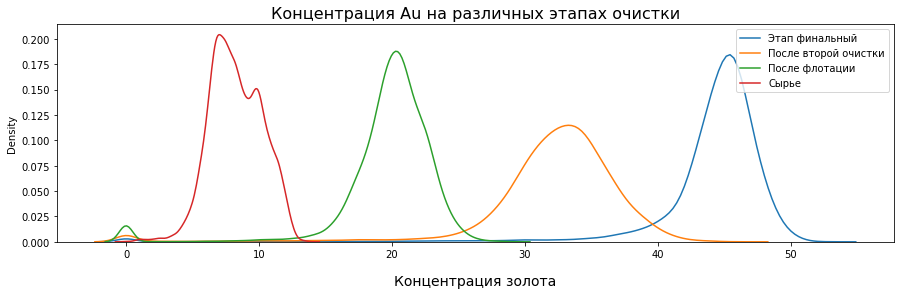

In [34]:
plt.figure(figsize=(15, 4))
plt.title('Концентрация Au на различных этапах очистки', fontsize=16)
plt.xlabel('Концентрация золота', labelpad=15, fontsize=14)
sns.kdeplot(gold_full['final.output.concentrate_au'], label = 'Этап финальный')
sns.kdeplot(gold_full['primary_cleaner.output.concentrate_au'], label = 'После второй очистки')
sns.kdeplot(gold_full['rougher.output.concentrate_au'], label = 'После флотации')
sns.kdeplot(gold_full['rougher.input.feed_au'], label = 'Сырье')
plt.legend()
plt.show()

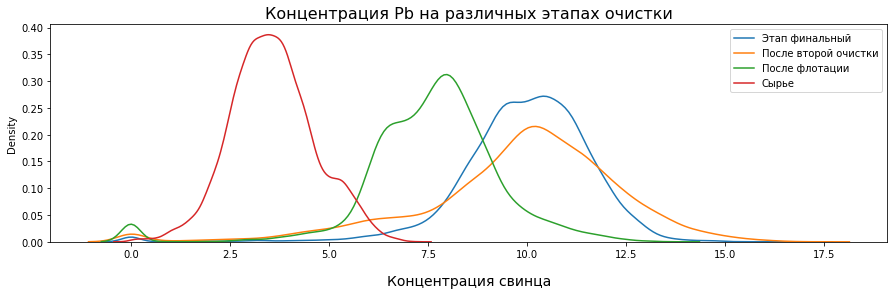

In [35]:
plt.figure(figsize=(15, 4))
plt.title('Концентрация Pb на различных этапах очистки', fontsize=16)
plt.xlabel('Концентрация свинца', labelpad=15, fontsize=14)
sns.kdeplot(gold_full['final.output.concentrate_pb'], label = 'Этап финальный')
sns.kdeplot(gold_full['primary_cleaner.output.concentrate_pb'], label = 'После второй очистки')
sns.kdeplot(gold_full['rougher.output.concentrate_pb'], label = 'После флотации')
sns.kdeplot(gold_full['rougher.input.feed_pb'], label = 'Сырье')
plt.legend()
plt.show()

Из графиков видно, что доля золота при каждом этаме повышается. Доля свинца сначала доля немного увеличивается после уменьшается либо остается такойже. А вот доля свинца сна сначала увеличивается, после остается примерно на одном уровне.

 ### Сравним распределения размеров гранул сырья

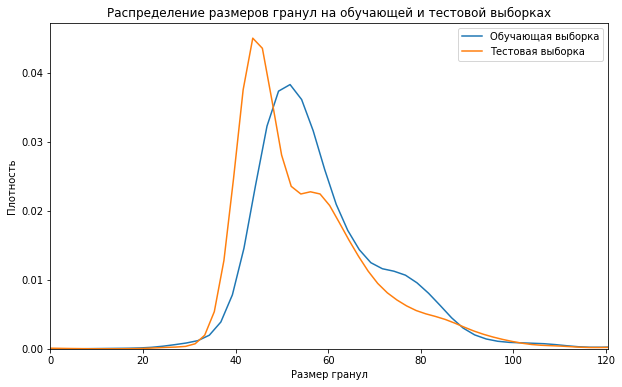

In [36]:
# Сравним распределения размеров гранул на тренировочной и тестовой выборках
plt.figure(figsize=(10, 6))
plt.title('Распределение размеров гранул на обучающей и тестовой выборках')
plt.xlabel('Размер гранул')
plt.ylabel('Плотность')
plt.xlim(0, gold_train['rougher.input.feed_size'].mean() * 2)
sns.kdeplot(gold_train['rougher.input.feed_size'], label='Обучающая выборка')
sns.kdeplot(gold_test['rougher.input.feed_size'], label='Тестовая выборка')
plt.legend()
plt.show()

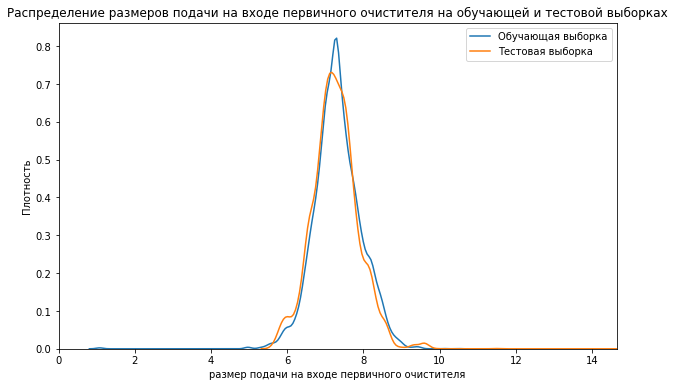

In [37]:
# Сравним распределения размеров гранул на тренировочной и тестовой выборках
plt.figure(figsize=(10, 6))
plt.title('Распределение размеров подачи на входе первичного очистителя на обучающей и тестовой выборках')
plt.xlabel('размер подачи на входе первичного очистителя')
plt.ylabel('Плотность')
plt.xlim(0, gold_train['primary_cleaner.input.feed_size'].mean() * 2)
sns.kdeplot(gold_train['primary_cleaner.input.feed_size'], label='Обучающая выборка')
sns.kdeplot(gold_test['primary_cleaner.input.feed_size'], label='Тестовая выборка')
plt.legend()
plt.show()

2.2 Резюме.

Если бы распределения сильно отличались друг от друга, оценка модели была бы неправильной. У нас отличия не слишком сильные поэтому оценка модели должна быть верной.

 ### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [38]:
# Суммарная концентрация четырей веществ на каждой стадии
gold_full['raw'] = gold_full[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 
                            'rougher.input.feed_sol']].sum(axis=1)
gold_full['rough concentrate'] = gold_full[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 
                            'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']].sum(axis=1)
gold_full['primary concentrate'] = gold_full[['primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_ag', 
                            'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol']].sum(axis=1)
gold_full['final concentrate'] = gold_full[['final.output.concentrate_au', 'final.output.concentrate_ag', 
                            'final.output.concentrate_pb', 'final.output.concentrate_sol']].sum(axis=1)

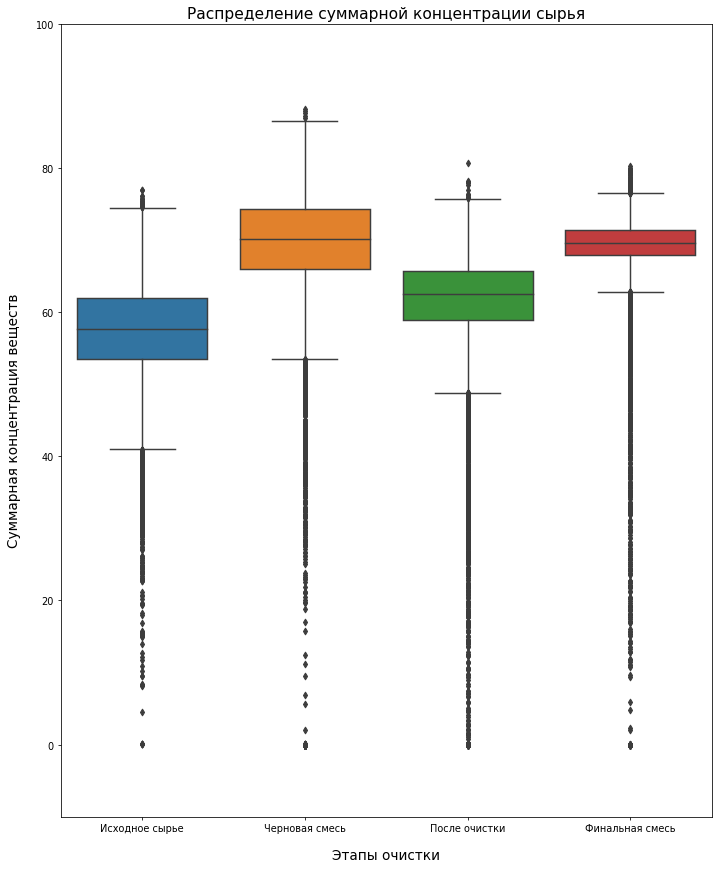

In [39]:
plt.figure(figsize=(12,15), dpi= 70)
sns.boxplot(data=gold_full[['raw', 'rough concentrate', 'primary concentrate', 'final concentrate']])
plt.title('Распределение суммарной концентрации сырья', fontsize=16)
plt.ylim(-10, 100)
plt.xlabel('Этапы очистки', labelpad=15, fontsize=14)
plt.ylabel('Суммарная концентрация веществ', labelpad=15, fontsize=14)
plt.xticks(np.arange(4), ('Исходное сырье', 'Черновая смесь', 'После очистки', 'Финальная смесь'))
plt.show()

Большенство выбросов находятся в первом квартиле.

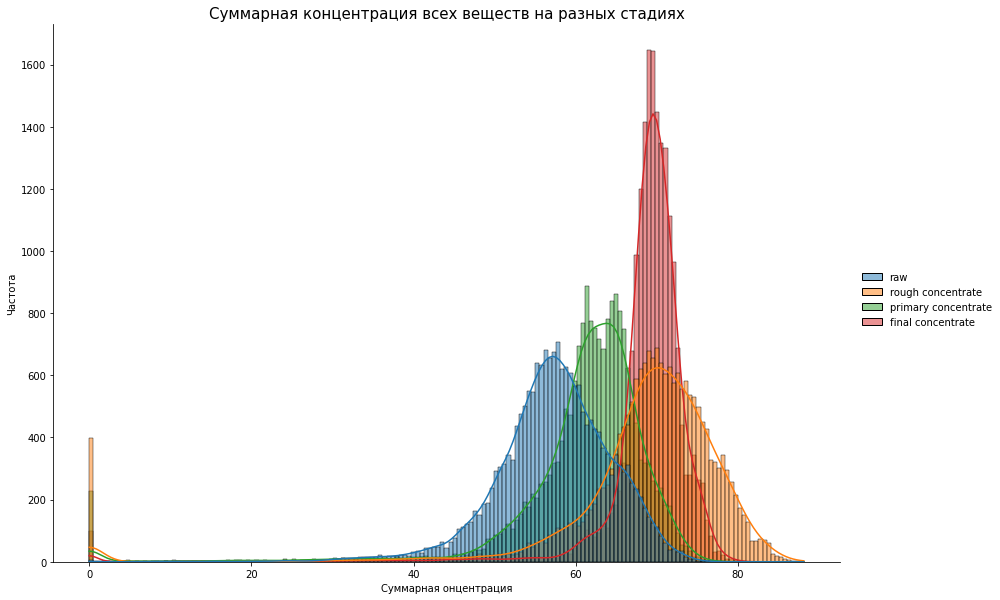

In [40]:
sns.displot(gold_full[['raw', 'rough concentrate', 'primary concentrate','final concentrate']], legend=True, kde=True, height=8, aspect=1.5)  
plt.title('Суммарная концентрация всех веществ на разных стадиях', fontsize=15)
plt.xlabel('Суммарная онцентрация')
plt.ylabel('Частота')
plt.show()

In [41]:
# сумма нулевых объектов
len(gold_full[gold_full['rough concentrate'] == 0]) + len(gold_full[gold_full['primary concentrate'] == 0]) + len(
    gold_full[gold_full['final concentrate'] == 0])

600

Удалим объекты с нулевыми значениями.

In [42]:
full_good = gold_full[    (gold_full['rougher.input.feed_ag'] > 0) &
    (gold_full['rougher.input.feed_pb'] > 0) &
    (gold_full['rougher.input.feed_sol'] > 0) &
    (gold_full['rougher.input.feed_au'] > 0) &
    (gold_full['rougher.output.concentrate_ag'] > 0) &
    (gold_full['rougher.output.concentrate_pb'] > 0) &
    (gold_full['rougher.output.concentrate_sol'] > 0) &
    (gold_full['rougher.output.concentrate_au'] > 0) &
    (gold_full['primary_cleaner.output.concentrate_ag'] > 0) &
    (gold_full['primary_cleaner.output.concentrate_pb'] > 0) &
    (gold_full['primary_cleaner.output.concentrate_sol'] > 0) &
    (gold_full['primary_cleaner.output.concentrate_au'] > 0) &
    (gold_full['final.output.concentrate_ag'] > 0) &
    (gold_full['final.output.concentrate_pb'] > 0) &
    (gold_full['final.output.concentrate_sol'] > 0) &
    (gold_full['final.output.concentrate_au'] > 0)]

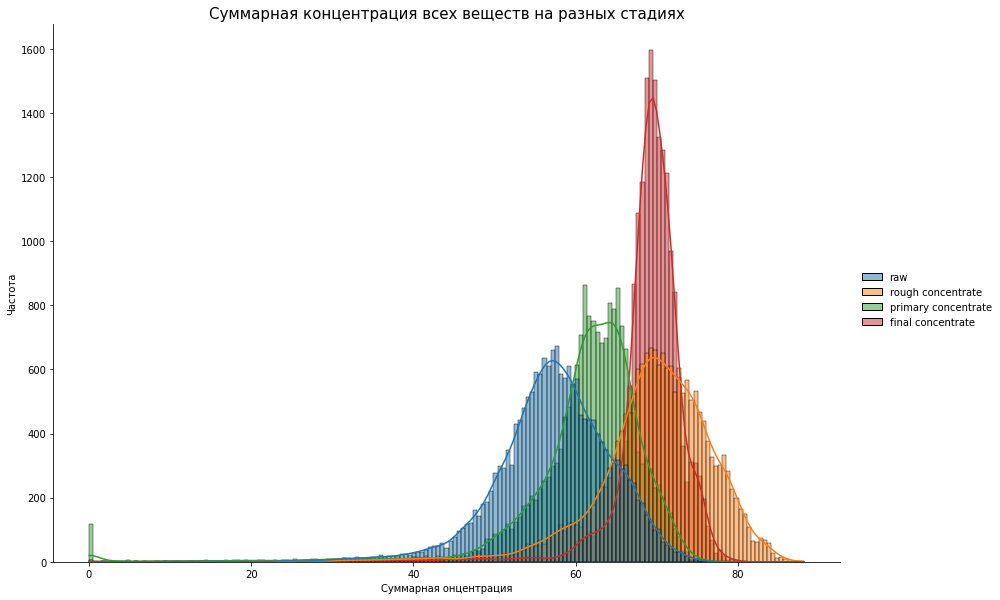

In [43]:
sns.displot(full_good[['raw', 'rough concentrate', 'primary concentrate', 'final concentrate']],
            legend=True, kde=True, height=8, aspect=1.5)  
plt.title('Суммарная концентрация всех веществ на разных стадиях', fontsize=15)
plt.xlabel('Суммарная онцентрация')
plt.ylabel('Частота')
plt.show()

Обнаружен еще один выброс в primary concentrate около нуля.

In [44]:
len(gold_full[gold_full['primary concentrate'] < 0.04])

225

In [45]:
len(gold_full[gold_full['primary concentrate'] < 1])

228

Видим что почти всевыбросы приходятся на значения менее 0.04 поэтому удалим значения менее этого числа. Удаление 225 объектов не будет кретичной для нашей выборки. А по расположению на графике и самому значению можно предположить, что это анамалии. 

In [46]:
full_good = full_good[full_good['primary concentrate'] >  0.04]

In [47]:
full_good = full_good.reset_index(drop=True) #сброс индексов

In [48]:
train_good = gold_train[gold_train['date'].isin(full_good['date'])].reset_index(drop=True)
test_good = gold_test[gold_test['date'].isin(full_good['date'])].reset_index(drop=True)

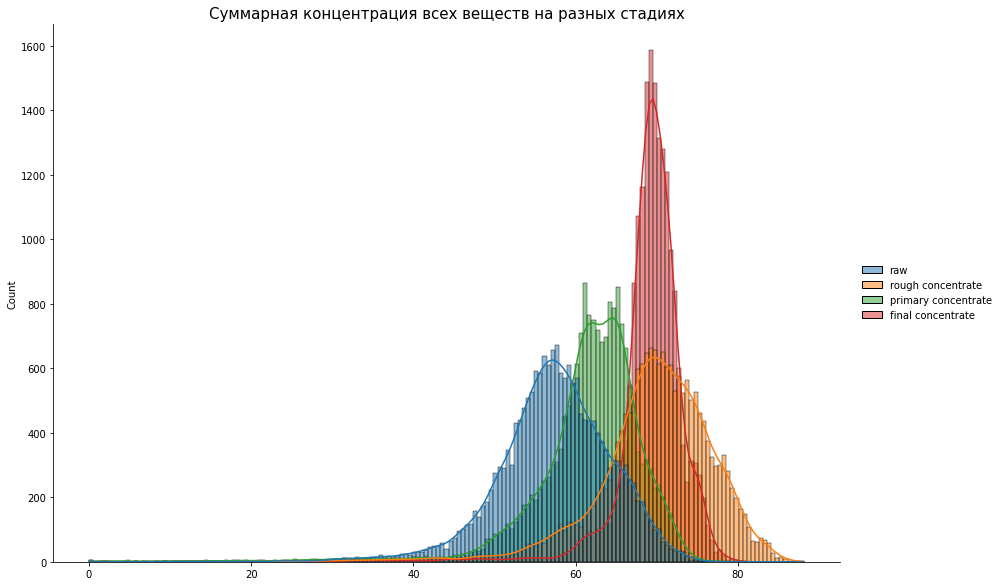

In [49]:
sns.displot(full_good[['raw', 'rough concentrate', 'primary concentrate', 'final concentrate']],
            legend=True, kde=True, height=8, aspect=1.5)  
plt.title('Суммарная концентрация всех веществ на разных стадиях', fontsize=15)
plt.show()

Больше таких анамалий на графике не наблюдается.

2.3 Резюме.
Посмотрели суммарную концентрацию всех веществ на разных стадиях. Были обнаружены аномальные выбросы и мы их удалили. На финальном этапе самая высокая концентрация веществ. 

2 Вывод:

С каждым этапом концентрация золота в руде повышается. Проанализировали распределения размеров гранул на обучающей и тестовой выборке сильных отличией небыло. Проанализировали суммарную концентрацию всех веществ на разных стадиях. Были обнаружены аномалии. Убрали найденные аномалии из обучающей и тестовой выборок.

## Модель

 ### Напишем функцию для вычисления итоговой sMAPE.

In [50]:
def smape(target, predictions):
    numerator = abs(predictions - target)
    denominator = (abs(target) + abs(predictions)) / 2
    summa = (numerator / denominator).sum()
    smape = 1 / len(target) * summa * 100
    return smape

In [51]:
def total_smape (smape_rougher, smape_final):
    total_smape = 0.25 * smape_rougher + 0.75 * smape_final
    return total_smape

 ### Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке.

In [52]:
# Разделим датафреймы на features и target
# train
target_rougher_train = train_good['rougher.output.recovery']
target_final_train = train_good['final.output.recovery']
features_train = train_good.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

# test
target_rougher_test = test_good['rougher.output.recovery']
target_final_test = test_good['final.output.recovery']
features_test = test_good.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

In [53]:
# Маштабируем признаки
numeric = features_train.columns
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Обучение моделей:

Линейная регрессия

In [54]:
scorer = make_scorer(smape, greater_is_better=False) 
    
cross_val_score_rougher = cross_val_score(LinearRegression(),
                features_train, target_rougher_train, cv=3, scoring=scorer).mean()
cross_val_score_final = cross_val_score(LinearRegression(),
                features_train, target_final_train, cv=3, scoring=scorer).mean()
total_smape_result = total_smape(cross_val_score_rougher, cross_val_score_final)
print('Итоговое sMAPE:', -total_smape_result)

Итоговое sMAPE: 12.618262775663444


Модель решающего дерева (модель регрессии)

In [55]:
cross_val_score_rougher = cross_val_score(DecisionTreeRegressor(random_state=12345),
                    features_train, target_rougher_train, cv=3, scoring=scorer).mean()
cross_val_score_final = cross_val_score(DecisionTreeRegressor(random_state=12345),
                    features_train, target_final_train, cv=3, scoring=scorer).mean()
total_smape_result = total_smape(cross_val_score_rougher, cross_val_score_final)
print('Итоговое sMAPE:', -total_smape_result)

Итоговое sMAPE: 15.255642995023294


Случайный лес (модель регрессии)

In [56]:
#for depth in range(3, 4):
#    
#    for estimator in range(9, 10):
#        
#        model = RandomForestRegressor(random_state=12345, 
#                       n_estimators=estimator, max_depth=depth)
#        
#        scorer = make_scorer(smape, greater_is_better=False) 
#    
#        cross_val_score_rougher = cross_val_score(model, features_train, target_rougher_train, cv=3, scoring=scorer).mean()
#        cross_val_score_final = cross_val_score(model, features_train, target_final_train, cv=3, scoring=scorer).mean()
#
#        total_smape_result = total_smape(cross_val_score_rougher, cross_val_score_final)
#        print('Итоговое sMAPE:', -total_smape_result)

Модель решающего дерева (модель регрессии) показывает лучшую метрику, используем ее для тестовой выборки.

In [57]:
#n_estimators_range = np.arange(10, 31, 10)
#max_depth_range = [None] + list(range(2, 11))

#for n_estimators in n_estimators_range:
#    for max_depth in max_depth_range:
#        model = RandomForestRegressor(random_state=12345, n_estimators=n_estimators, n_jobs=-1, max_depth=max_depth)
        
#        scorer = make_scorer(smape, greater_is_better=False) 
    
#        cross_val_score_rougher = cross_val_score(model, features_train, target_rougher_train, cv=3, scoring=scorer).mean()
#        cross_val_score_final = cross_val_score(model, features_train, target_final_train, cv=3, scoring=scorer).mean()

#        total_smape_result = total_smape(cross_val_score_rougher, cross_val_score_final)
#        print('n_estimators =', n_estimators, 'max_depth =', max_depth, 'Итоговое sMAPE:', -total_smape_result)

In [58]:
# Определение диапазона значений гиперпараметров
n_estimators_range = np.arange(10, 31, 10)
max_depth_range = [None] + list(range(2, 11))

# Инициализация переменных для лучшего значения метрики и соответствующих гиперпараметров
best_sMAPE = 1000
best_n_estimators = None
best_max_depth = None

# Перебор значений гиперпараметров и расчет метрики sMAPE
for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        model = RandomForestRegressor(random_state=12345, n_estimators=n_estimators, n_jobs=-1, max_depth=max_depth)
        scorer = make_scorer(smape, greater_is_better=False) 
    
        # Расчет метрики sMAPE на кросс-валидации
        cross_val_score_rougher = cross_val_score(model, features_train, target_rougher_train, cv=3, scoring=scorer).mean()
        cross_val_score_final = cross_val_score(model, features_train, target_final_train, cv=3, scoring=scorer).mean()
        total_sMAPE = -total_smape(cross_val_score_rougher, cross_val_score_final)
        
        # Обновление лучшего значения метрики и соответствующих гиперпараметров
        if total_sMAPE < best_sMAPE:
            best_sMAPE = total_sMAPE
            best_n_estimators = n_estimators
            best_max_depth = max_depth

# Вывод лучшего значения метрики и соответствующих гиперпараметров
print('Лучшее значение метрики sMAPE:', best_sMAPE)
print('Лучшее значение гиперпараметра n_estimators:', best_n_estimators)
print('Лучшее значение гиперпараметра max_depth:', best_max_depth)

Лучшее значение метрики sMAPE: 9.340993920127085
Лучшее значение гиперпараметра n_estimators: 10
Лучшее значение гиперпараметра max_depth: 2


Проверка модели решающего деревана на тестовой выборке

In [59]:
# model_final = DecisionTreeRegressor(random_state=12345, max_depth=3)

# model_final.fit(features_train, target_rougher_train)
# predictions_rougher = model_final.predict(features_test)

# model_final.fit(features_train, target_final_train)
# predictions_final = model_final.predict(features_test)

# smape_rougher = smape(target_rougher_test, predictions_rougher)
# smape_final = smape(target_final_test, predictions_final)

# print('Итоговое sMAPE:', total_smape(smape_rougher, smape_final))

Проверка модели случайного леса на тестовой выборке

In [62]:
model_final = RandomForestRegressor(random_state=12345, 
                 n_estimators=10, max_depth=2)

model_final.fit(features_train, target_rougher_train)
predictions_rougher = model_final.predict(features_test)

model_final.fit(features_train, target_final_train)
predictions_final = model_final.predict(features_test)

smape_rougher = smape(target_rougher_test, predictions_rougher)
smape_final = smape(target_final_test, predictions_final)

print('Итоговое sMAPE:', total_smape(smape_rougher, smape_final))

Итоговое sMAPE: 6.979542726977544


In [61]:
# Создадим константную модель с помошью DummyRegressor. С параметром strategy='mean' всегда предсказывает среднее значение обучающей выборки.
model = DummyRegressor(strategy='mean')

model.fit(features_train, target_rougher_train)
predictions_rougher = model.predict(features_test)

model.fit(features_train, target_final_train)
predictions_final = model.predict(features_test)

smape_rougher= smape(target_rougher_test, predictions_rougher)
smape_final= smape(target_final_test, predictions_final)

print('Итоговое sMAPE', total_smape(smape_rougher, smape_final))

Итоговое sMAPE 7.766279746369013


3 Резюме.

Написваали функцию для вычисления итоговой sMAPE. После провели сравнение разных моделей, лучший результат показала модель решающего дерева. Обученная модель на тестовой выборке показывает метрику лучше константной модели, проверка на адекватность пройдена.

# Вывод:

Мы подготовили прототип модели машинного обучения для «Цифры». Модель предсказывает коэффициент восстановления золота из золотосодержащей руды. Использовали данные с параметрами добычи и очистки.

Подготовили данные;
Были открыты и изучены файлы. Проверка эффективности обогощения показала свою правельность. Пропуски заполнили предыдущими значениями. В тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков. Поэтому мы добовляем в тестовую выборку целевые признаки, а из обучающей выборки удалим признаки отсутствующие в тестовой. Теперь данные готовы к дальнейшей работе.

Проводим исследовательский анализ данных;
С каждым этапом концентрация золота в руде повышается. Проанализировали распределения размеров гранул на обучающей и тестовой выборке сильных отличией небыло поэтому оценку модели считаем правельной. Проанализировали суммарную концентрацию всех веществ на разных стадиях. Были обнаружены аномалии. Убрали найденные аномалии из обучающей и тестовой выборок.

Построить и обучить модель.
Написваали функцию для вычисления итоговой sMAPEВ. После провели сравнение разных моделей (логистическая регрессия, дерево решений, случайны лес), лучший результат показала модель случайного леса. Обученная модель на тестовой выборке показывает метрику лучше константной модели, проверка на адекватность пройдена. Наша модель поможет оптимизировать производство, и предупредит запуск предприятие с убыточными характеристиками.